In [0]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from cv2 import cv2
from google.colab import drive
import pandas as pd 
import keras 
from keras.models import load_model

Using TensorFlow backend.


In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=c27936b0165ae1f24a51117e4c4454d3695082c82c0ceba76e8d4d272ef52aac
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


**Authorize Google Drive**


In [0]:
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/APM'  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/APM/model

/content/gdrive/My Drive/APM/model


**Load Video Emotion Detection Model**

In [0]:
model=load_model('Video_Emotion_Detection.hdf5')

**Summary of the ConvNet model**

In [64]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 254, 254, 16)      160       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 252, 252, 16)      2320      
_________________________________________________________________
batch_normalization_13 (Batc (None, 252, 252, 16)      64        
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 254, 254, 16)      0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 252, 252, 32)      4640      
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 250, 250, 32)      9248

**Test model with Actor 01**

In [65]:
cd '/content/gdrive/My Drive/APM/Dataset/unzipped/Actor_01'

/content/gdrive/My Drive/APM/Dataset/unzipped/Actor_01


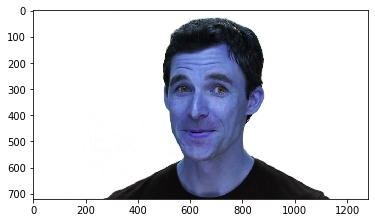

Top Emotion :  calm
Second Top Emotion :  happy


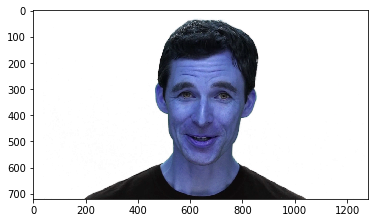

Top Emotion :  happy
Second Top Emotion :  fearful


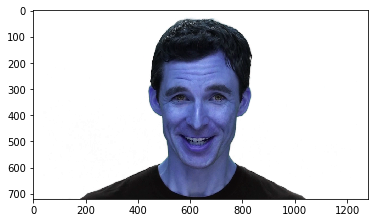

Top Emotion :  fearful
Second Top Emotion :  calm


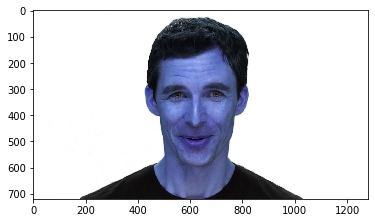

Top Emotion :  neutral
Second Top Emotion :  calm


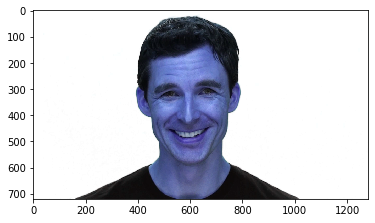

Top Emotion :  fearful
Second Top Emotion :  calm


In [68]:
#Assign the Emotion Dictionary 
emotion_dict={'neutral':1, 'calm':2, 'happy':3, 'sad':4 , 'angry':5, 'fearful':6, 'disgust':7, 'surprised':8}

Y=[]
#Run the model for Actor 1, Emotion : Happy
cap = cv2.VideoCapture('01-01-03-02-02-02-01.mp4')
frame_count = 0
while True:
        

        frame_count += 1
        # read the next frame from the file
        (grabbed, frame) = cap.read()

        # If the frame was not grabbed, then we have reached the end of the stream
        if not grabbed:
          break

        # Grab every 20th frame to capture a slightly different expression each time;
        elif frame_count % 20 == 0:
          x=[]
          plt.imshow(frame)
          #Show caught frame
          plt.show()
          
          #Resize frame to 256 by 256 to run in the model 
          frame=cv2.resize(frame, (256,256))
          frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
          frame = np.reshape(frame, [frame.shape[0], frame.shape[1], 1])
          x.append(frame)
          #Obtain array of pixels
          x = np.array(x)

          #Obtain Prediction from array of pixels
          pred_array=model.predict(x)

          #Find Top Two Predicted Emotions
          predicted_class=np.argpartition(pred_array[0], -4)[-4:][0] + 1
          predicted_class2=np.argpartition(pred_array[0], -4)[-4:][1] + 1
    
          label_map = dict((v,k) for k,v in emotion_dict.items()) 
          predicted_label = label_map[predicted_class]
          print("Top Emotion : ",predicted_label)
          predicted_label2 = label_map[predicted_class2]
          print("Second Top Emotion : ",predicted_label2)
          

